# LeNet Lab for traffic signs

## Load Data

Load training, vadidation and testing sets from the traffic signs data.


Image Shape: (32, 32, 3)
Image Shape: (34799, 32, 32, 3)
Image Shape norm: (32, 32, 1)
Image Shape norm: (34799, 32, 32, 1)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


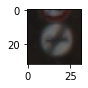

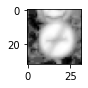

In [11]:
# Load pickled data
import matplotlib.pyplot as plt
import pickle
import cv2
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
X_valid, y_valid = valid['features'], valid['labels']

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
X_test, y_test = test['features'], test['labels']

def preprocess(data):
    """Convert to grayscale, histogram equalize, and expand dims"""
    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    return imgs
X_normalized = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

#rgb_weights = [0.2989, 0.5870, 0.1140]
#X_normalized = np.dot(X_train[...,:3], rgb_weights)
#X_normalized = np.expand_dims(X_normalized, axis=3)


#X_valid = np.dot(X_valid[...,:3], rgb_weights)
#X_valid = np.expand_dims(X_valid, axis=3)

#X_test = np.dot(X_test[...,:3], rgb_weights)
#X_test = np.expand_dims(X_test, axis=3)

### print images
index_loc = 0
image = X_train[index_loc].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

image_norm = X_normalized[index_loc].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image_norm, cmap='Greys_r')
#print(X_normalized[0])

#X_normalized = (X_normalized - 128)/ 128
#X_valid = (X_valid - 128)/ 128
#X_test = (X_train - 128)/ 128

X_normalized = (X_normalized - np.mean(X_normalized)) / np.std(X_normalized)
X_valid = (X_valid - np.mean(X_valid)) / np.std(X_valid)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

#def center_normaize(data, mean, std):
#    """Center normalize images"""
#    data = data.astype('float32')
#    data -= mean
#    data /= std
#    return data

#mean = np.mean(X_normalized)
#std = np.std(X_normalized)

#X_train = center_normaize(X_normalized, mean, std)
#X_valid = center_normaize(X_valid, mean, std)
#X_test = center_normaize(X_test, mean, std)

print()
print("Image Shape: {}".format(X_train[1].shape))
print("Image Shape: {}".format(X_train.shape))

print("Image Shape norm: {}".format(X_normalized[1].shape))
print("Image Shape norm: {}".format(X_normalized.shape))

print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

## Visualize Data

View a sample from the dataset.

[[[38 32 26]
  [34 30 25]
  [33 31 25]
  ...
  [19 20 22]
  [20 21 23]
  [20 21 23]]

 [[40 35 27]
  [37 34 26]
  [39 35 27]
  ...
  [21 20 22]
  [22 22 24]
  [23 24 24]]

 [[37 35 29]
  [37 36 28]
  [37 35 27]
  ...
  [27 26 26]
  [27 27 28]
  [27 28 28]]

 ...

 [[29 31 30]
  [30 29 29]
  [31 29 28]
  ...
  [36 34 34]
  [29 30 31]
  [30 30 31]]

 [[28 29 29]
  [29 28 28]
  [31 29 28]
  ...
  [36 34 35]
  [29 30 31]
  [29 30 30]]

 [[28 29 28]
  [28 27 27]
  [29 27 26]
  ...
  [37 34 35]
  [29 31 31]
  [29 30 29]]]
 
-------------
 
[[-0.46621193 -0.80563261 -0.80563261 ... -1.71528004 -1.62024225
  -1.62024225]
 [-0.07248394 -0.34402048 -0.18109855 ... -1.62024225 -1.55235811
  -1.43016666]
 [-0.18109855 -0.18109855 -0.18109855 ... -1.32155205 -1.24009108
  -1.17220695]
 ...
 [-0.92782405 -1.06359233 -1.06359233 ... -0.18109855 -0.92782405
  -0.92782405]
 [-1.06359233 -1.17220695 -1.06359233 ... -0.18109855 -0.92782405
  -0.92782405]
 [-1.06359233 -1.24009108 -1.24009108 ... -0.18109

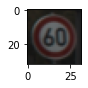

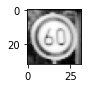

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
image_norm = X_normalized[index].squeeze()

print(image)
print(" ")
print("-------------")
print(" ")
print(image_norm)



plt.figure(figsize=(1,1))
plt.imshow(image)

plt.figure(figsize=(1,1))
plt.imshow(image_norm, cmap='Greys_r')
print(y_train[index])

## Preprocess Data

Shuffle the training data.

In [3]:
from sklearn.utils import shuffle
X_train = X_normalized
X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [4]:
import tensorflow as tf

# the more epochs, the better the model will train, but the longer training will take
EPOCHS = 30

# how many traing images to run through the network at a time. 
# Larger size -> faster training, but the processor may have memory limit on the batch size
BATCH_SIZE = 128

/home/q426889/miniconda3/envs/carnd-term1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/q426889/miniconda3/envs/carnd-term1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/q426889/miniconda3/envs/carnd-term1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/q426889/miniconda3/

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [5]:
from tensorflow.contrib.layers import flatten

print("Successfully loaded shit")

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # This layer has 5x5 filter with an input depth of 1 and an output depth of 6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    
    # We use conv2d function to convolve filter over the images and we add the bias at the end.
    # Formula for convolutions tells us:
    # output_heigth = (input_heigth - filter_higth + 1) / vertical_stride
    # In this case: (32 - 5 + 1 ) / 1 = 28
    # Same for output_width
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Input = 28x28x6 -> Pooling using the 2x2 kernel with the 2x2 stride -> Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout 0.5
    fc1 = tf.nn.dropout(fc1, dropout_prob)


    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout 0.5
    fc2 = tf.nn.dropout(fc2, dropout_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # these outputs are also known as logits, which is what we return from the lenet function.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print("Done. Everything's fine")
    return logits

Successfully loaded shit


## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [6]:
# None allows a placeholder to set the batch of any size.
# Image dimentions = 32 x 32 x 3
# y stores labels, which are not one-hot encoded yet.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dropout_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [7]:
# learning rate tell the network how quickly to update the weight
rate = 0.001

logits = LeNet(x)

# compare the logits with the ground truth labels and calculate the cross-entrophy.
# cross-entrophy is just a measure how different the logits are from the ground truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# average the cross-entrophy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

# use adam algorithm to minimize the loss function, similarly to what stochastic gradient descent does.
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

#  uses back-propagation to update the network and minimize the training loss
training_operation = optimizer.minimize(loss_operation)

Done. Everything's fine


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [8]:
# Step 1: measure, that the given prediction is correct 
# by comparing the logit prediction to the one-hot encoded ground-truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# Step 2: calculate model's overall accuracy, 
# by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.689

EPOCH 2 ...
Validation Accuracy = 0.815

EPOCH 3 ...
Validation Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.908

EPOCH 5 ...
Validation Accuracy = 0.908

EPOCH 6 ...
Validation Accuracy = 0.918

EPOCH 7 ...
Validation Accuracy = 0.937

EPOCH 8 ...
Validation Accuracy = 0.936

EPOCH 9 ...
Validation Accuracy = 0.944

EPOCH 10 ...
Validation Accuracy = 0.942

EPOCH 11 ...
Validation Accuracy = 0.952

EPOCH 12 ...
Validation Accuracy = 0.956

EPOCH 13 ...
Validation Accuracy = 0.952

EPOCH 14 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.954

EPOCH 17 ...
Validation Accuracy = 0.959

EPOCH 18 ...
Validation Accuracy = 0.957

EPOCH 19 ...
Validation Accuracy = 0.962

EPOCH 20 ...
Validation Accuracy = 0.963

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.964

EPOCH 23 ...
Validation Accuracy = 0.964

EPOCH 24 ...
Validation Accura

In [ ]:
STOP!

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [13]:
# run once you're done!
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.008
